## Decision Tree(1st dataset)

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
import warnings
warnings.filterwarnings("ignore")

In [69]:
df=pd.read_csv("salaries.csv")
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [70]:
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [71]:
df.tail()

,company,job,degree,salary_more_then_100k
11,facebook,sales executive,masters,1
12,facebook,business manager,bachelors,1
13,facebook,business manager,masters,1
14,facebook,computer programmer,bachelors,1
15,facebook,computer programmer,masters,1


In [72]:
X=df.iloc[:,:-1]
X

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [73]:
y=df.iloc[:,-1]
y

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [74]:
df.isnull().sum()

company                  0
job                      0
degree                   0
salary_more_then_100k    0
dtype: int64

In [75]:
#training kum underfit or training zayada to overfit

In [76]:
from sklearn.preprocessing import LabelEncoder

In [77]:
l_company=LabelEncoder()
l_deg=LabelEncoder()
l_job=LabelEncoder()

In [78]:
X['company_n']=l_company.fit_transform(X['company'])

In [79]:
X['job_n']=l_job.fit_transform(X['job'])

In [80]:
X['deg_n']=l_deg.fit_transform(X['degree'])

In [81]:
X

,company,job,degree,company_n,job_n,deg_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [82]:
X=X.drop(columns=['company','job','degree'])
X

,company_n,job_n,deg_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [83]:
from sklearn.model_selection import train_test_split
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [84]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size = 0.30, random_state=42)
X_train

,company_n,job_n,deg_n
11,1,2,1
8,0,0,0
9,0,0,1
2,2,0,0
15,1,1,1
4,2,1,0
7,0,1,0
10,1,2,0
12,1,0,0
3,2,0,1


In [85]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

11
5
11
5


In [91]:
from sklearn import tree

In [92]:
model=tree.DecisionTreeClassifier()

In [93]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [94]:
pred=model.predict(X_test)
pred

array([0, 0, 0, 1, 1], dtype=int64)

In [57]:
model.score(X_train,y_train)

1.0

In [58]:
pred=model.predict([[2,0,0]])
pred

array([1], dtype=int64)

In [61]:
model.score(X_test,y_test)

0.8

In [95]:
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score, classification_report

In [97]:
cm=confusion_matrix(y_test,pred)
cm

array([[2, 0],
       [1, 2]], dtype=int64)

In [98]:
cr=classification_report(y_test,pred)
print(cr)

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.67      0.80         3

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



## 2nd Dataset

In [99]:
df=pd.read_csv("Salaries (1).csv")
df

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800
...,...,...,...,...,...,...
73,Prof,B,18,10,Female,105450
74,AssocProf,B,19,6,Female,104542
75,Prof,B,17,17,Female,124312
76,Prof,A,28,14,Female,109954


In [100]:
X=df.iloc[:,:-1]
X

,rank,discipline,phd,service,sex
0,Prof,B,56,49,Male
1,Prof,A,12,6,Male
2,Prof,A,23,20,Male
3,Prof,A,40,31,Male
4,Prof,B,20,18,Male
...,...,...,...,...,...
73,Prof,B,18,10,Female
74,AssocProf,B,19,6,Female
75,Prof,B,17,17,Female
76,Prof,A,28,14,Female


In [101]:
y=df.iloc[:,-1]
y

0     186960
1      93000
2     110515
3     131205
4     104800
       ...  
73    105450
74    104542
75    124312
76    109954
77    109646
Name: salary, Length: 78, dtype: int64

In [102]:
df.isnull().sum()

rank          0
discipline    0
phd           0
service       0
sex           0
salary        0
dtype: int64

In [103]:
from sklearn.preprocessing import LabelEncoder

In [104]:
l_rank=LabelEncoder()
l_gend=LabelEncoder()
l_disc=LabelEncoder()

In [105]:
X['rank_n']=l_rank.fit_transform(X['rank'])

In [106]:
X['discipline_n']=l_disc.fit_transform(X['discipline'])

In [109]:
X['gen_n']=l_gend.fit_transform(X['sex'])

In [110]:
X

,rank,discipline,phd,service,sex,rank_n,discipline_n,gen_n
0,Prof,B,56,49,Male,2,1,1
1,Prof,A,12,6,Male,2,0,1
2,Prof,A,23,20,Male,2,0,1
3,Prof,A,40,31,Male,2,0,1
4,Prof,B,20,18,Male,2,1,1
...,...,...,...,...,...,...,...,...
73,Prof,B,18,10,Female,2,1,0
74,AssocProf,B,19,6,Female,0,1,0
75,Prof,B,17,17,Female,2,1,0
76,Prof,A,28,14,Female,2,0,0


In [111]:
X=X.drop(columns=['rank','discipline','sex'])
X

,phd,service,rank_n,discipline_n,gen_n
0,56,49,2,1,1
1,12,6,2,0,1
2,23,20,2,0,1
3,40,31,2,0,1
4,20,18,2,1,1
...,...,...,...,...,...
73,18,10,2,1,0
74,19,6,0,1,0
75,17,17,2,1,0
76,28,14,2,0,0


In [112]:
from sklearn.model_selection import train_test_split
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [113]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size = 0.30, random_state=42)
X_train

,phd,service,rank_n,discipline_n,gen_n
40,39,36,2,0,0
16,8,3,1,1,1
42,4,2,1,1,0
47,11,11,0,1,0
50,10,5,1,1,0
7,18,18,2,0,1
28,7,2,1,1,1
74,19,6,0,1,0
45,25,25,2,1,0
69,28,7,2,0,0


In [114]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

54
24
54
24


In [115]:
from sklearn import tree


In [116]:
model=tree.DecisionTreeClassifier()

In [117]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [118]:
pred=model.predict(X_test)
pred

array([123683, 146856,  75044,  92000, 162200, 109954,  75044, 123683,
       111512,  78500, 103994,  77500, 127512,  73300, 102000, 127512,
       123683, 140096, 155865, 110515, 153750, 111512,  78500,  78500],
      dtype=int64)

In [119]:
model.score(X_train,y_train)

0.9814814814814815

In [120]:
model.score(X_test,y_test)

0.0

In [121]:
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score, classification_report

In [123]:
cm=confusion_matrix(y_test,pred)
cm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [124]:
cr=classification_report(y_test,pred)
print(cr)

              precision    recall  f1-score   support

       57800       0.00      0.00      0.00       1.0
       62884       0.00      0.00      0.00       1.0
       63100       0.00      0.00      0.00       1.0
       73000       0.00      0.00      0.00       1.0
       73300       0.00      0.00      0.00       0.0
       73500       0.00      0.00      0.00       1.0
       75044       0.00      0.00      0.00       0.0
       77500       0.00      0.00      0.00       0.0
       78500       0.00      0.00      0.00       0.0
       88000       0.00      0.00      0.00       1.0
       90450       0.00      0.00      0.00       1.0
       92000       0.00      0.00      0.00       0.0
      102000       0.00      0.00      0.00       0.0
      103750       0.00      0.00      0.00       1.0
      103994       0.00      0.00      0.00       0.0
      104800       0.00      0.00      0.00       1.0
      107008       0.00      0.00      0.00       1.0
      107300       0.00    

In [126]:
acc=accuracy_score(y_test,pred)
acc

0.0

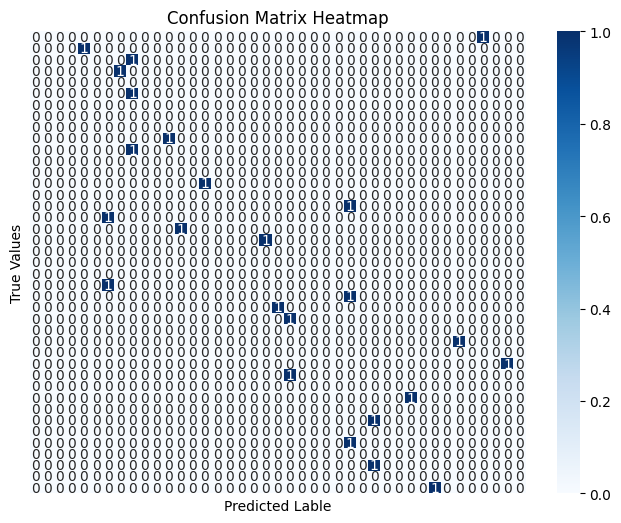

In [125]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[],
            yticklabels=[])
plt.xlabel('Predicted Lable')
plt.ylabel('True Values')
plt.title('Confusion Matrix Heatmap')
plt.show()